In [100]:
import pandas as pd

In [8]:
#!pip install nsepy

In [9]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2

In [65]:
#!pip install yfinance

In [101]:
import yfinance as yf

In [102]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
#symbol = 'TATACOFFEE.NS'  # Stock symbol in uppercase

stk_data = yf.download('TATACOFFEE.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [103]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       143 non-null    float64
 1   High       143 non-null    float64
 2   Low        143 non-null    float64
 3   Close      143 non-null    float64
 4   Adj Close  143 non-null    float64
 5   Volume     143 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [104]:
stk_data['Close'].max()

235.8000030517578

In [105]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [106]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.600006,189.000000,183.000000,184.550003
2021-07-02,183.050003,187.500000,182.149994,186.399994
2021-07-05,187.850006,198.350006,187.850006,192.449997
2021-07-06,193.800003,194.800003,187.350006,188.800003
2021-07-07,187.800003,193.949997,185.399994,192.850006
...,...,...,...,...
2022-01-19,218.000000,219.000000,214.199997,217.899994
2022-01-20,219.500000,224.399994,218.399994,219.699997
2022-01-21,217.699997,224.399994,216.699997,219.550003


In [107]:
column="Close"
column

'Close'

In [108]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [109]:
data1

array([[0.05268033],
       [0.08687609],
       [0.19870608],
       [0.13123855],
       [0.20609996],
       [0.1617375 ],
       [0.15157109],
       [0.09057317],
       [0.19408501],
       [0.19408501],
       [0.19316074],
       [0.1580407 ],
       [0.13678389],
       [0.04990752],
       [0.31977821],
       [0.4926064 ],
       [0.62476893],
       [0.99075786],
       [0.61737533],
       [0.55083179],
       [0.56931607],
       [0.55452859],
       [0.46303143],
       [0.57948249],
       [0.50646961],
       [0.56377073],
       [0.48428824],
       [0.39186681],
       [0.27356749],
       [0.40573003],
       [0.45101675],
       [0.3743068 ],
       [0.34750464],
       [0.33733822],
       [0.13863215],
       [0.        ],
       [0.27541603],
       [0.31885394],
       [0.26340108],
       [0.24491679],
       [0.31885394],
       [0.58133075],
       [0.54343819],
       [0.51386321],
       [0.47874318],
       [0.41404818],
       [0.5683918 ],
       [0.558

In [110]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [111]:
#from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)

    for td in trends:

        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train),len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.20654748849078589
maPe-Testset: 0.3394937380142982
************
Lag=1,Trend=t
RMSE-Testset: 0.2566081137498472
maPe-Testset: 0.48085478872141685
************
Lag=1,Trend=c
RMSE-Testset: 0.13637560786345088
maPe-Testset: 0.24036686571027172
************
Lag=1,Trend=ct
RMSE-Testset: 0.14531436690469735
maPe-Testset: 0.2619950131393076
************
Lag=2,Trend=n
RMSE-Testset: 0.20794265058538544
maPe-Testset: 0.3413588770465708
************
Lag=2,Trend=t
RMSE-Testset: 0.2679089734863768
maPe-Testset: 0.5022414272715727
************
Lag=2,Trend=c
RMSE-Testset: 0.13681618155927297
maPe-Testset: 0.24067020943866524
************
Lag=2,Trend=ct
RMSE-Testset: 0.15147028701245308
maPe-Testset: 0.2752688766653898
************
Lag=3,Trend=n
RMSE-Testset: 0.1835949502963747
maPe-Testset: 0.3083142771166432
************
Lag=3,Trend=t
RMSE-Testset: 0.2520678152766649
maPe-Testset: 0.47306914504960856
************
Lag=3,Trend=c
RMSE-Testset: 0.1366232823287689
maPe-Testse

In [113]:
y_pred

array([0.56184546, 0.58305376, 0.59911899, 0.61733114, 0.63322   ,
       0.64573459, 0.65629264, 0.66499931, 0.67207401, 0.67799649,
       0.68304428, 0.68742368, 0.69132612, 0.69488606, 0.69819913,
       0.70133857, 0.70435649, 0.7072894 , 0.71016346, 0.71299703,
       0.7158028 , 0.71858958, 0.72136346, 0.72412861, 0.72688787,
       0.72964316, 0.7323958 , 0.73514667, 0.73789637])

In [114]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
#from sklearn.metrics import r2_score
#mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.14531436690469735
maPe-Testset: 0.2619950131393076
************


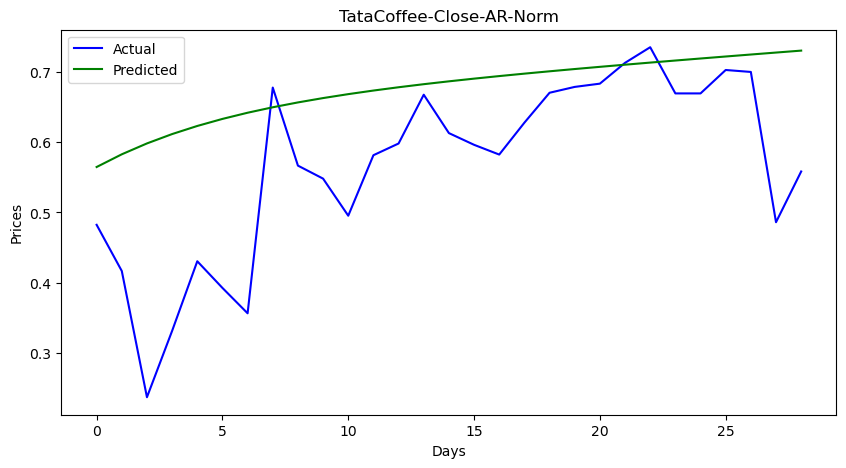

In [115]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [96]:
len(data1)

143

In [125]:
#y_test

In [97]:
column

'Close'

In [123]:
import pandas as pd # jaya personal code 
Actual_y_test = pd.DataFrame(index=range(len(y_test)),columns =['Close'])
for i in range(len(y_test)):
        Actual_y_test.loc[i] =y_test[i]

Actual_y_test

,Close
0,0.48244
1,0.416821
2,0.237523
3,0.331793
4,0.430684
5,0.392791
6,0.356747
7,0.677449
8,0.566544
9,0.548059


In [29]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [30]:
aTestNormTable

,Close
0,0.48244
1,0.416821
2,0.237523
3,0.331793
4,0.430684
5,0.392791
6,0.356747
7,0.677449
8,0.566544
9,0.548059


In [31]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [127]:
actual_stock_price_test_ori

array([[207.80000305],
       [204.25      ],
       [194.55000305],
       [199.6499939 ],
       [205.        ],
       [202.94999695],
       [201.        ],
       [218.3500061 ],
       [212.3500061 ],
       [211.3500061 ],
       [208.5       ],
       [213.1499939 ],
       [214.05000305],
       [217.80000305],
       [214.8500061 ],
       [213.94999695],
       [213.19999695],
       [215.6499939 ],
       [217.94999695],
       [218.3999939 ],
       [218.6499939 ],
       [220.25      ],
       [221.44999695],
       [217.8999939 ],
       [217.8999939 ],
       [219.69999695],
       [219.55000305],
       [208.        ],
       [211.8999939 ]])

In [33]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [34]:
actual_stock_price_test_oriA

,Close
0,207.800003
1,204.25
2,194.550003
3,199.649994
4,205.0
5,202.949997
6,201.0
7,218.350006
8,212.350006
9,211.350006


In [152]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,207.800003
1,204.25
2,194.550003
3,199.649994
4,205.0
5,202.949997
6,201.0
7,218.350006
8,212.350006
9,211.350006


In [151]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])
predicted_stock_price_test_oriP


,Close
0,212.244174
1,213.220032
2,214.0559
3,214.775336
4,215.39793
5,215.939978
6,216.415034
7,216.83437
8,217.207361
9,217.541808


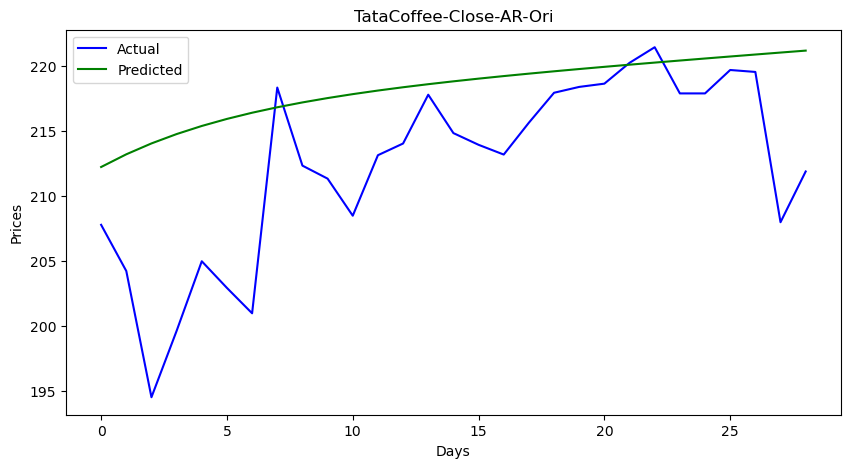

In [141]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [142]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 7.861508136472637
maPe-Testset: 0.028929846911169586


In [39]:
len(data1)

143

In [143]:
forecast=model_fit.predict(len(data1),len(data1)+2)

In [144]:
forecast

array([0.73268569, 0.73541944, 0.73814082])

In [145]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Close_forecast"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Close_forecast"])

In [146]:
forecast_stock_price_test_oriF

,Close_forecast
0,221.338297
1,221.486193
2,221.63342


In [44]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

In [45]:
forecast_stock_price_test_oriF

,Close_forecast
0,221.338297
1,221.486193
2,221.63342


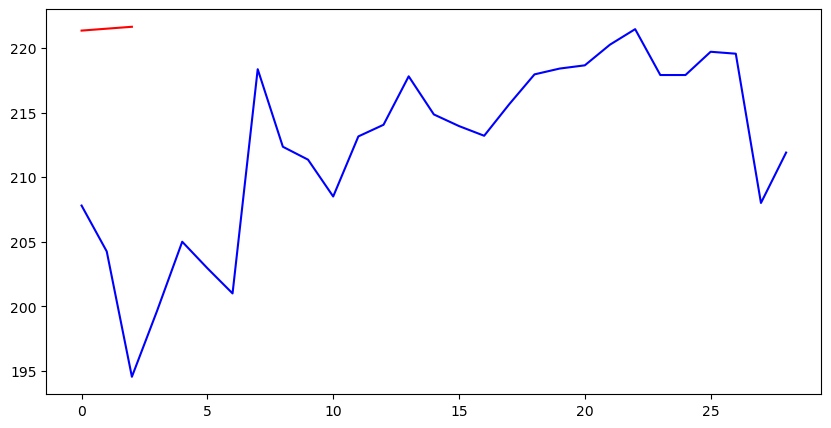

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA, color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
plt.show()